In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from datetime import date
import calendar
import math

In [ ]:
"""приведение DF к нормальному виду(считывание, удаление None значений, добавление отклонений от среднего и медианы)"""
def datasetNormalise()->DataFrame:
    df = pd.read_csv('dataset.csv', sep=',', names=['Date', 'Value'])
    df = df.dropna()
    # df = df.query('Date >= "1998-01-01"')
    df_mean = df["Value"].mean()
    df_median = df["Value"].median()
    df["Mean"] = df.apply(lambda x: (abs(x["Value"] - df_mean)), axis=1)
    df["Median"] = df.apply(lambda x: (abs(x["Value"] - df_median)), axis=1)
    df = df.sort_values(by="Date", ascending=True)
    return df

In [ ]:
"""нахождение значений с отлонением от медианы >= заданного значения value"""
def findValueByMean(df:DataFrame, value:float)->DataFrame:
    return df.query('Mean >= @value')

In [ ]:
"""нахождение значений во временном отрезке"""
def findValueInTimedelta(df:DataFrame, first_date:date, last_date:date)->DataFrame:
    return df.query('Date >= @first_date and Date <= @last_date')

In [ ]:
"""построение графиков значений в определенном месяце, среднего значения и медианы"""
def makePlotMonth(df:DataFrame, year:int, month:int):
    fig = plt.figure(figsize=(10, 5))
    plt.ylabel('Значение')
    plt.xlabel('Дата')
    plt.title('Курс Доллара')
    _, last_day = calendar.monthrange(year, month)
    first = str(date(year, month, 1))
    last = str(date(year, month, last_day))
    new_df = findValueInTimedelta(df, first, last)
    x = new_df["Date"]
    y = new_df["Value"]
    y1 = new_df["Value"].mean()
    y2 = new_df["Value"].median()
    plt.scatter(x, y, color='black', linestyle='-', linewidths=1)
    plt.axhline (y=y1, color='red', linestyle='--', label='Среднее значение')
    plt.axhline (y=y2, color='brown', linestyle='--', label='Медиана') 
    plt.legend()
    plt.show()

In [ ]:
"""построение графика курса за весь период"""
def makePlot(df:DataFrame):
    fig = plt.figure(figsize=(10, 5))
    plt.ylabel('Значение')
    plt.xlabel('Дата')
    plt.title('Курс Доллара')
    new_df = df.query('Date >= "1998-01-01"')
    x = new_df["Date"]
    y = new_df["Value"]
    y1 = new_df["Value"].mean()
    y2 = new_df["Value"].median()
    plt.scatter(x, y, color='black', linestyle='-', linewidths=1)
    plt.axhline (y=y1, color='red', linestyle='--', label='Среднее значение')
    plt.axhline (y=y2, color='brown', linestyle='--', label='Медиана') 
    plt.legend()
    plt.show()

In [20]:

df = datasetNormalise()
df

,Date,Value,Mean,Median
7183,1992-07-01,125.2600,364.474188,93.4772
7182,1992-07-03,134.8000,354.934188,103.0172
7181,1992-07-08,130.5000,359.234188,98.7172
7180,1992-07-10,130.3000,359.434188,98.5172
7179,1992-07-15,130.2000,359.534188,98.4172
...,...,...,...,...
4,2023-09-20,96.2236,393.510588,64.4408
3,2023-09-21,96.6172,393.116988,64.8344
2,2023-09-22,96.0762,393.657988,64.2934
1,2023-09-23,96.0419,393.692288,64.2591


In [21]:
df.describe()

,Value,Mean,Median
count,7184.000000,7184.000000,7184.000000
mean,489.734188,799.978554,462.619284
std,1431.429669,1186.986148,1429.927680
min,5.960000,3.265812,0.000900
25%,28.540425,429.542938,2.677525
50%,31.782800,459.195688,7.104250
75%,65.919575,462.765588,34.136775
max,5960.000000,5470.265812,5928.217200


In [22]:
findValueByMean(df, 500)

,Date,Value,Mean,Median
7091,1993-05-28,994.0,504.265812,962.2172
7090,1993-06-02,1050.0,560.265812,1018.2172
7089,1993-06-04,1072.0,582.265812,1040.2172
7088,1993-06-09,1104.0,614.265812,1072.2172
7087,1993-06-16,1116.0,626.265812,1084.2172
...,...,...,...,...
6390,1997-12-24,5950.0,5460.265812,5918.2172
6389,1997-12-25,5955.0,5465.265812,5923.2172
6388,1997-12-26,5955.0,5465.265812,5923.2172
6387,1997-12-27,5958.0,5468.265812,5926.2172


In [23]:
findValueInTimedelta(df, '2023-02-02', '2023-03-03')

,Date,Value,Mean,Median
161,2023-02-02,70.1217,419.612488,38.3389
160,2023-02-03,70.0414,419.692788,38.2586
159,2023-02-04,70.3847,419.349488,38.6019
158,2023-02-07,70.5991,419.135088,38.8163
157,2023-02-08,70.8924,418.841788,39.1096
156,2023-02-09,71.5763,418.157888,39.7935
155,2023-02-10,72.8949,416.839288,41.1121
154,2023-02-11,72.7923,416.941888,41.0095
153,2023-02-14,73.6307,416.103488,41.8479
152,2023-02-15,73.8645,415.869688,42.0817


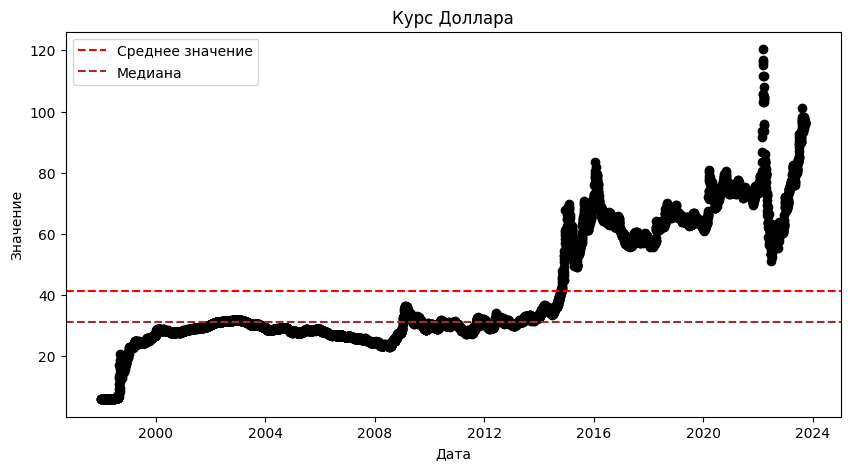

In [29]:
makePlot(df)

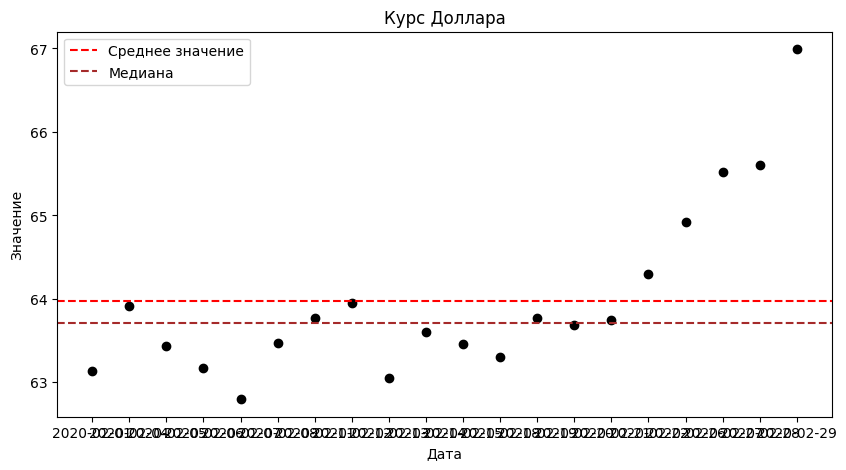

In [25]:
makePlotMonth(df, 2020, 2)

In [28]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.groupby([(df["Date"].dt.year), (df["Date"].dt.month)]).mean()

Date       Value        Mean      Median
Date Date                                                                  
1992 7    1992-07-16 00:00:00.000000000  141.556000  348.178188  109.773200
     8    1992-08-16 12:00:00.000000000  168.162500  321.571688  136.379700
     9    1992-09-15 08:00:00.000000000  220.488889  269.245299  188.706089
     10   1992-10-16 16:00:00.000000000  353.777778  135.956410  321.994978
     11   1992-11-15 12:00:00.000000000  426.250000   63.484188  394.467200
...                                 ...         ...         ...         ...
2023 5    2023-05-17 08:50:31.578947328   79.212595  410.521593   47.429795
     6    2023-06-15 19:25:42.857142784   83.319333  406.414854   51.536533
     7    2023-07-15 18:17:08.571428608   90.474048  399.260140   58.691248
     8    2023-08-15 15:39:07.826086912   95.285348  394.448840   63.502548
     9    2023-09-13 06:40:00.000000000   96.585300  393.148888   64.802500

[375 rows x 4 columns]